In [68]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from Modelos   import *
from FuncsChern import *

import matplotlib.pyplot as plt

plt.rcParams.update({
    'text.usetex':    True,
    'font.family':    'serif',
    'font.serif':     ['Computer Modern'], 
    'axes.unicode_minus': False,
    'text.latex.preamble': r'\usepackage{amsfonts}',
})

def createletters(axs, Axis3D=[], coord=[0.08, 0.92], ni=0, SMALL_SIZE=20):
    import numpy as np
    letters = [r'\textbf{(a)}', r'\textbf{(b)}', r'\textbf{(c)}', r'\textbf{(d)}', r'\textbf{(e)}', r'\textbf{(f)}',
               r'\textbf{(g)}', r'\textbf{(h)}',r'\textbf{(i)}']
    # Aplanar axs si es un array multidimensional
    axs = np.ravel(axs)
    for n, ax in enumerate(axs):
        if n in Axis3D:
            ax.text2D(coord[0], coord[1], letters[max([n, ni])], transform=ax.transAxes, size=SMALL_SIZE, weight='bold')
        else:
            ax.text(coord[0], coord[1], letters[max([n, ni])], transform=ax.transAxes, size=SMALL_SIZE, weight='bold')


# Zhang Model

## Bands

In [26]:
def createletters(axs, Axis3D=[], coord=[0.08, 0.92], ni=0, SMALL_SIZE=20):
    import numpy as np
    letters = [r'\textbf{(a)}', r'\textbf{(b)}', r'\textbf{(c)}', r'\textbf{(d)}', r'\textbf{(e)}', r'\textbf{(f)}',
               r'\textbf{(g)}', r'\textbf{(h)}',r'\textbf{(i)}']
    # Aplanar axs si es un array multidimensional
    axs = np.ravel(axs)
    for n, ax in enumerate(axs):
        if n in Axis3D:
            ax.text2D(coord[0], coord[1], letters[max([n, ni])], transform=ax.transAxes, size=SMALL_SIZE, weight='bold')
        else:
            ax.text(coord[0], coord[1], letters[max([n, ni])], transform=ax.transAxes, size=SMALL_SIZE, weight='bold')


def TP(A,B):
    return np.kron(A,B)

def Hamiltonian_BHZ(params):
    C0 = params['C0']
    C2 = params['C2']
    M0   = params['M0']
    M2   = params['M2']
    A   = params['A'] 
    a    = params['a']
    kx   = params['kx']
    ky   = params['ky']
    G    = params['G']
    T    = params['T']

    epsk = C0 + 2*C2/a**2 *(2-np.cos(kx*a)-np.cos(ky*a))
    Mk   = M0 + 2*M2/a**2*(2-np.cos(kx*a)-np.cos(ky*a))

    H = ( epsk * TP(s0, s0)
        + Mk   * TP(s0, sz)
        + (A/a) * ( np.sin(kx*a)*TP(s0, sx)
                   + np.sin(ky*a)*TP(sz, sy) )
        + G    * TP(sz, sz)
        + T    * TP(sx, sx)
        )
    return H

H_params={
    'C0':0,
    'C2':19.6,
    'M0':-0.28,
    'M2':56.6,
    'A':2.2,
    'a':4,
    'G':1.,
    'T':0
}

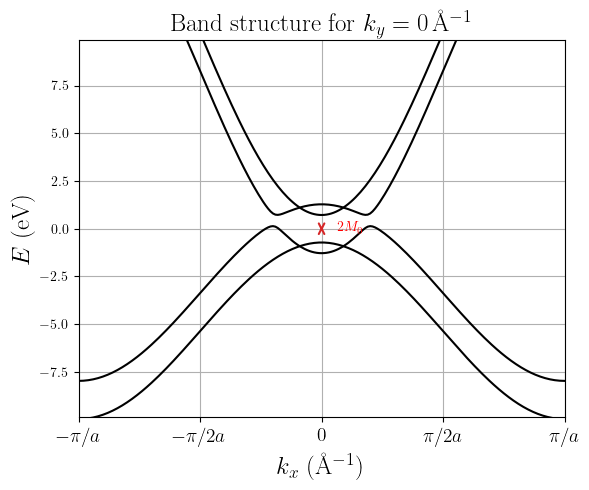

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# ----------- Parámetros ------------------
Npts = 201
a = H_params['a']             
H_params['ky']=0   

# kx grid en \AA^{-1}
kx_vals = np.linspace(-np.pi/a, np.pi/a, Npts)   # Esto da [-pi/a, pi/a] en Å^{-1}

E_all = []
for kx in kx_vals:
    H_params['kx'] = kx
    H = Hamiltonian_BHZ(params=H_params)
    E = np.linalg.eigvalsh(H)
    E_all.append(np.sort(E))
E_all = np.array(E_all)

fig, ax = plt.subplots(figsize=(6, 5))

for band in E_all.T:
    ax.plot(kx_vals, band, color='black')

ax.annotate(
    '',                              # sin texto directo
    xy=(0,  H_params["M0"]), xytext=(0, -H_params["M0"]),  # punta superior e inferior
    arrowprops=dict(arrowstyle='<->', lw=1.5, color='tab:red'),
)

# Pon la etiqueta «2M0» en el centro de la flecha
ax.text(
    0.05, 0.0, r'$2M_0$',            # un poco desplazada en x
    va='center', ha='left', c='r'
)

# Etiquetas X en Å^{-1}
xticks = np.array([-np.pi, -np.pi/2, 0, np.pi/2, np.pi]) / a
xtick_labels = [
    r"$-\pi/a$", r"$-\pi/2a$", r"$0$", r"$\pi/2a$", r"$\pi/a$"
]
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, fontsize=14)
ax.set_xlim(kx_vals[0], kx_vals[-1])
ax.set_ylim(-np.max(E_all)/2,np.max(E_all)/2)
ax.grid(True)

# Ejes
ax.set_xlabel(r'$k_x$ (\AA$^{-1}$)', fontsize=18)
ax.set_ylabel(r'$E$ (eV)', fontsize=18)

# Título informativo solo sobre k_y
ax.set_title(rf'Band structure for $k_y={0}\,$\AA$^{{-1}}$', fontsize=18)

plt.tight_layout()
#plt.savefig('Figs/Bandas_ky.pdf')
plt.show()

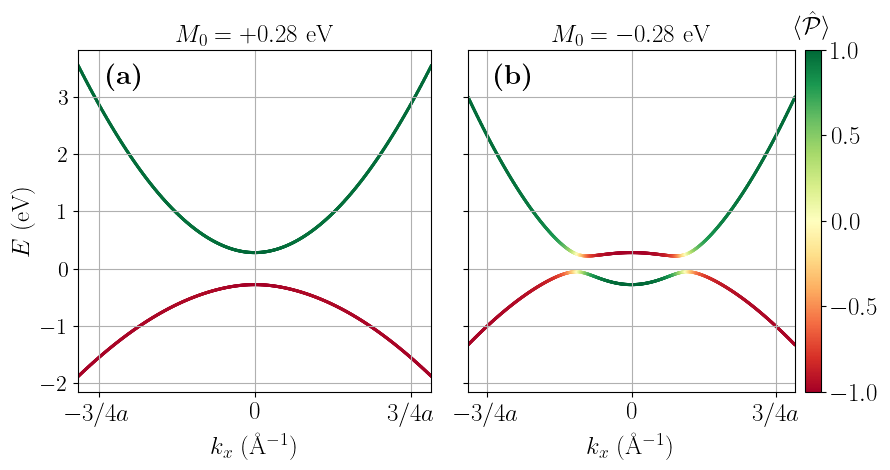

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def paridad_op(n_bandas):
    return np.array([1, -1] * (n_bandas//2))

# --- Parámetros generales ---
Npts = 501
H_params['G'] = 0
H_params['T'] = 0
a = H_params['a']
H_params['ky'] = 0

kx_vals = np.linspace(-0.75/a-0.1/a, 0.75/a+0.1/a, Npts)   # [-pi/a, pi/a] en Å^{-1}

# --- Bucle para M0 positivo y negativo ---
fig, axs = plt.subplots(1, 2, figsize=(9, 5), sharey=True)

for i, M0_sign in enumerate([+1, -1]):
    H_params['M0'] = abs(H_params['M0']) * M0_sign
    E_all = []
    paridades = []
    for kx in kx_vals:
        H_params['kx'] = kx
        H = Hamiltonian_BHZ(params=H_params)
        # Diagonaliza y saca autovectores también
        E, V = np.linalg.eigh(H)
        E = np.real(E)
        E_all.append(np.sort(E))
        # Calcula valor esperado de la paridad para cada banda
        P_op = np.diag(paridad_op(H.shape[0]))
        par_bandas = [np.real(np.vdot(V[:, j], P_op @ V[:, j])) for j in range(V.shape[1])]
        paridades.append(np.array(par_bandas))
    E_all = np.array(E_all)
    paridades = np.array(paridades)

    # Elige un colormap discreto para paridad
    cmap = plt.get_cmap('RdYlGn') 
    norm = plt.Normalize(-1, 1)

    for band, paridad in zip(E_all.T, paridades.T):
        axs[i].scatter(kx_vals, band, c=paridad, cmap=cmap, norm=norm, s=5, lw=0)

    axs[i].set_xlabel(r'$k_x$ (\AA$^{-1}$)', fontsize=18)
    if i == 0:
        axs[i].set_ylabel(r'$E$ (eV)', fontsize=18)
    axs[i].set_xticks(np.array([-np.pi, -np.pi/2, -0.75, 0, 0.75, np.pi/2, np.pi]) / a)
    axs[i].set_xticklabels([r"$-\pi/a$", r"$-\pi/2a$", r"$-3/4a$", r"$0$",r"$3/4a$", r"$\pi/2a$", r"$\pi/a$"], fontsize=18)
    axs[i].tick_params(axis='y', labelsize=16)
    axs[i].set_title(rf'$M_0 = {H_params["M0"]:+.2f}$ eV', fontsize=18)
    axs[i].grid(True)
    axs[i].set_xlim(kx_vals[0], kx_vals[-1])
    #axs[i].set_ylim(-2, 2)

#fig.suptitle(r'Bandas coloreadas por paridad, $k_y=0$', fontsize=18)
# Añade un eje manualmente para la barra de color (valores: [left, bottom, width, height])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
#cbar_ax = fig.add_axes([1., 0.15, 0.015, 0.7])  # ajusta el 0.92 si quieres moverla aún más

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(sm, cax=cax)
cbar.ax.set_title(r"$\langle \hat{\mathcal{P}}\rangle$", fontsize=18, pad=12)
cbar.ax.tick_params(labelsize=18)

createletters(axs, coord=[0.08, 0.9])



plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('Figs/Bandas_Parity.pdf', bbox_inches='tight')
plt.show()

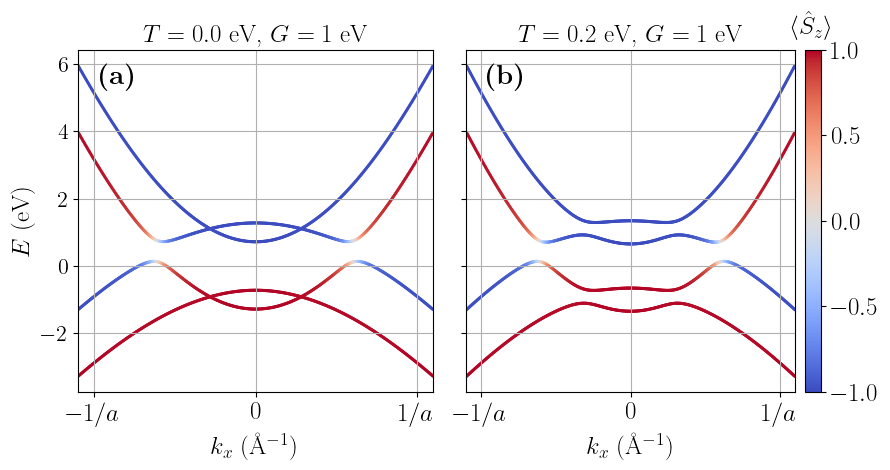

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def paridad_op(n_bandas):
    return np.array([1,-1,1,-1])

def spin_op(n_bandas):
    return np.array([-1,1,1,-1])

# --- Parámetros generales ---
Npts = 501
a = H_params['a']
H_params['G'] = 1
#H_params['T'] = 0
H_params['ky'] = 0
H_params['T'] = 0.2

kx_vals = np.linspace(-1/a-0.1/a, 1/a+0.1/a, Npts)   # [-pi/a, pi/a] en Å^{-1}

# --- Bucle para M0 positivo y negativo ---
fig, axs = plt.subplots(1, 2, figsize=(9, 5), sharey=True)

for i, T_val in enumerate([0, 0.2]):
    H_params['T'] = T_val
    E_all = []
    paridades = []
    spines = []
    for kx in kx_vals:
        H_params['kx'] = kx
        H = Hamiltonian_BHZ(params=H_params)
        # Diagonaliza y saca autovectores también
        E, V = np.linalg.eigh(H)
        E = np.real(E)
        E_all.append(np.sort(E))
        # Calcula valor esperado de la paridad para cada banda
        P_op = np.diag(paridad_op(H.shape[0]))
        par_bandas = [np.real(np.vdot(V[:, j], P_op @ V[:, j])) for j in range(V.shape[1])]
        paridades.append(np.array(par_bandas))

        S_op=np.diag(spin_op(H.shape[0]))
        spin_bandas = [np.real(np.vdot(V[:, j], S_op @ V[:, j])) for j in range(V.shape[1])]
        spines.append(np.array(spin_bandas))

    E_all = np.array(E_all)
    paridades = np.array(paridades)
    spines = np.array(spines)

    # Elige un colormap discreto para paridad
    cmap_P = plt.get_cmap('RdYlGn') 
    cmap_S = plt.get_cmap('coolwarm') 
    norm = plt.Normalize(-1, 1)

    for band, paridad, spine in zip(E_all.T, paridades.T, spines.T):
        if i == 0:
            axs[i].scatter(kx_vals, band, c=spine, cmap=cmap_S, norm=norm, s=5, lw=0)
            axs[i].set_ylabel(r'$E$ (eV)', fontsize=18)
        if i == 1:
            axs[i].scatter(kx_vals, band, c=spine, cmap=cmap_S, norm=norm, s=5, lw=0)
    axs[i].set_xlabel(r'$k_x$ (\AA$^{-1}$)', fontsize=18)
    axs[i].set_xticks(np.array([-np.pi, -np.pi/2, -1, 0, 1, np.pi/2, np.pi]) / a)
    axs[i].set_xticklabels([r"$-\pi/a$", r"$-\pi/2a$", r"$-1/a$", r"$0$",r"$1/a$", r"$\pi/2a$", r"$\pi/a$"], fontsize=18)
    axs[i].tick_params(axis='y', labelsize=16)
    axs[i].set_title(rf'$T = {H_params["T"]:.1f}$ eV, $G= {H_params["G"]}$ eV', fontsize=18)
    axs[i].grid(True)
    axs[i].set_xlim(kx_vals[0], kx_vals[-1])
    #axs[i].set_ylim(-2, 2)

#fig.suptitle(r'Bandas coloreadas por paridad, $k_y=0$', fontsize=18)
# Añade un eje manualmente para la barra de color (valores: [left, bottom, width, height])
sm_P = plt.cm.ScalarMappable(cmap=cmap_P, norm=norm)
sm_P.set_array([])
sm_S = plt.cm.ScalarMappable(cmap=cmap_S, norm=norm)
sm_S.set_array([])

# Ejes de la colorbar (ajusta el primer número para separar)
divider0 = make_axes_locatable(axs[0])
#cax0 = divider0.append_axes("right", size="5%", pad=0.1)
#cbar0 = plt.colorbar(sm_P, cax=cax0)
#cbar0.set_label(r"$\left\langle \hat{\mathcal{P}}\right\rangle$", fontsize=18,rotation=np.pi)
#cbar0.ax.tick_params(labelsize=18)
#cbar0.ax.set_title(r"$\langle \hat{\mathcal{P}}\rangle$", fontsize=18, pad=12)

# 2) Colorbar para SPIN en el segundo subplot
divider1 = make_axes_locatable(axs[1])
cax1 = divider1.append_axes("right", size="5%", pad=0.1)
cbar1 = plt.colorbar(sm_S, cax=cax1)
cbar1.ax.set_title(r"$\langle \hat{S}_z\rangle$", fontsize=18, pad=12)
cbar1.ax.tick_params(labelsize=18)

createletters(axs, coord=[0.06, 0.9])

plt.tight_layout()  # deja sitio a la barra de la derecha
plt.subplots_adjust(top=0.85)
plt.savefig('Figs/Bandas_Spin.pdf')
plt.show()

## Topological invariants

In [30]:
import numpy as np
import tqdm as tqdm
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, ListedColormap

# ----------------------------------------------------------------------------------
# 1) Definición de funciones
# ----------------------------------------------------------------------------------
def M_k(kx, ky, M0, M2, a):
    return M0 + 2*M2/a**2 * (2 - np.cos(kx*a) - np.cos(ky*a))

def gap_squared(kx, ky, M0, M2, A, a):
    Mk = M_k(kx, ky, M0, M2, a)
    return Mk**2 + (A/a)**2 * (np.sin(kx*a)**2 + np.sin(ky*a)**2)

# ----------------------------------------------------------------------------------
# 2) Rango de parámetros ------------------------------------------------------------
# ----------------------------------------------------------------------------------
M0_vals = np.linspace(-8.0,  8.0, 301)     # eV
M2_vals = np.linspace(-1.0,  1.0, 301)     # eV·Å²
nbins   = len(M0_vals)

# parámetros fijos
A, a  = 1.0, 1.0       # eV·Å , Å
C0 = C2 = 0.0          # ← irrelevantes aquí

# malla k-space (pequeña, basta para gap)
Nk = 101
kgrid = np.linspace(-np.pi/a, np.pi/a, Nk)
KX, KY = np.meshgrid(kgrid, kgrid, indexing='ij')
sin2_grid = (np.sin(KX*a)**2 + np.sin(KY*a)**2)

# TRIMs para el ℤ₂
TRIM = [(0, 0),
        (np.pi/a, 0),
        (0, np.pi/a),
        (np.pi/a, np.pi/a)]

# ----------------------------------------------------------------------------------
# 3) Mapas: gap mínimo y ℤ₂
# ----------------------------------------------------------------------------------
gap_map = np.empty((nbins, nbins))
z2_map  = np.empty((nbins, nbins))          # 0 = trivial, 1 = topológico

for i, M0 in enumerate(M0_vals):
    for j, M2 in enumerate(M2_vals):
        # --- Gap mínimo (sobre malla completa) ---
        Mk_grid = M_k(KX, KY, M0, M2, a)
        gap2    = Mk_grid**2 + (A/a)**2 * sin2_grid
        gap_map[j, i] = 2*np.sqrt(gap2.min())      #  factor 2: E+ − E−

        # --- ℤ₂: producto de signos en TRIMs ---
        prod = 1
        for kx, ky in TRIM:
            prod *= np.sign(M_k(kx, ky, M0, M2, a))
        z2_map[j, i] = 1 if prod < 0 else 0        # 1 = topológico

gap_map[gap_map<10**-4]=10**-4

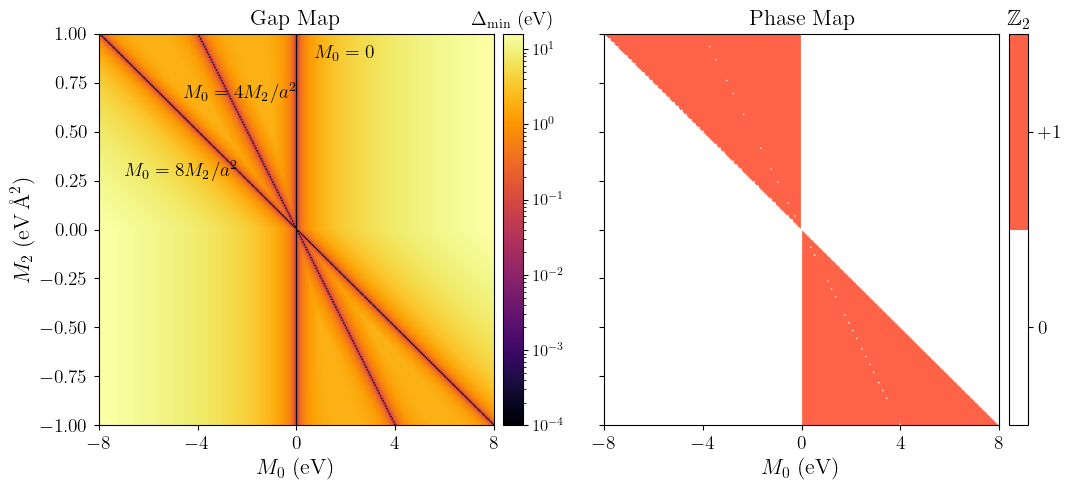

In [19]:
# ----------------------------------------------------------------------------------
# 4) Figura 1×2
# ----------------------------------------------------------------------------------
fig, (ax_gap, ax_z2) = plt.subplots(1, 2, figsize=(11, 5),
                                    sharex=True, sharey=True)

# (a) gap mínimo con escala logarítmica
eps = 1e-5                                           # evita log(0)
im0 = ax_gap.imshow(gap_map + eps, origin='lower',
                    cmap='inferno',
                    norm=LogNorm(vmin=gap_map[gap_map>0].min(),
                                 vmax=gap_map.max()),
                    extent=[M0_vals[0], M0_vals[-1],
                            M2_vals[0], M2_vals[-1]],
                    aspect='auto')
cbar0 = fig.colorbar(im0, ax=ax_gap, pad=0.02)
cbar0.ax.set_title(r"$\Delta_{\min}$  (eV)", fontsize=14)
cbar0.ax.tick_params(labelsize=12)

# (b) ℤ₂ con mapa binario
cmap_z2 = ListedColormap(['white', 'tomato'])
im1 = ax_z2.imshow(z2_map, origin='lower',
                   cmap=cmap_z2, vmin=0, vmax=1,
                   extent=[M0_vals[0], M0_vals[-1],
                           M2_vals[0], M2_vals[-1]],
                   aspect='auto')
cbar1 = fig.colorbar(im1, ax=ax_z2, ticks=[0.25, 0.75], pad=0.02)
cbar1.ax.set_yticklabels(['0', '+1'],fontsize=14)
cbar1.ax.set_title(r"$\mathbb{Z}_2$",fontsize=16)

# ejes comunes
for ax in (ax_gap, ax_z2):
    ax.set_xlabel(r"$M_0$ (eV)", fontsize=16)
    ax.set_xticks([-8, -4, 0, 4, 8])
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='both', labelsize=14)

ax_gap.set_ylabel(r"$M_2$  (eV\,\AA$^2$)", fontsize=16)
ax_gap.set_title('Gap Map',fontsize=16)
ax_z2.set_title('Phase Map',fontsize=16)
ax_gap.text(
    0.7, 0.9, r'$M_0=0$',            
    va='center', ha='left', c='k',fontsize=14
)

ax_gap.text(
    -4.6, 0.7, r'$M_0=4M_2/a^2$',            # un poco desplazada en x
    va='center', ha='left', c='k',fontsize=14
)

ax_gap.text(
    -7, 0.3, r'$M_0=8M_2/a^2$',            # un poco desplazada en x
    va='center', ha='left', c='k',fontsize=14
)

plt.tight_layout()
plt.savefig('Figs/ZhangPhases.pdf')
plt.show()

/var/folders/tv/w7tvz05d1j781wvdwyk3sq100000gn/T/ipykernel_25790/4168321842.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


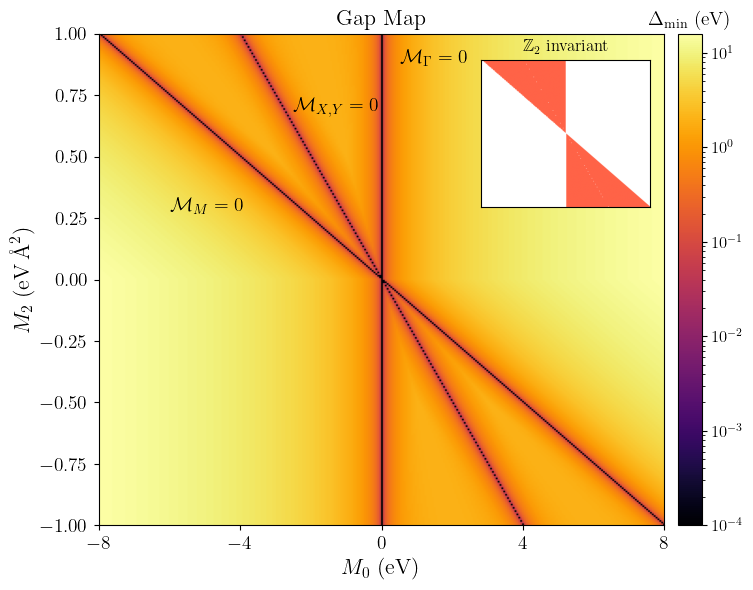

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# ----------------------------------------------------------------------------------
# 2) Figura con eje principal y inset
# ----------------------------------------------------------------------------------
fig, ax_gap = plt.subplots(1, 1, figsize=(8, 6))

# Plot principal: gap mínimo con escala logarítmica
eps = 1e-5  # evita log(0)
im0 = ax_gap.imshow(gap_map + eps, origin='lower',
                    cmap='inferno',
                    norm=LogNorm(vmin=gap_map[gap_map>0].min(),
                                 vmax=gap_map.max()),
                    extent=[M0_vals[0], M0_vals[-1],
                            M2_vals[0], M2_vals[-1]],
                    aspect='auto')
cbar0 = fig.colorbar(im0, ax=ax_gap, pad=0.02)
cbar0.ax.set_title(r"$\Delta_{\min}$ (eV)", fontsize=14)
cbar0.ax.tick_params(labelsize=12)

# Ejes y textos del gap
ax_gap.set_xlabel(r"$M_0$ (eV)", fontsize=16)
ax_gap.set_ylabel(r"$M_2$ (eV\,\AA$^2$)", fontsize=16)
ax_gap.set_xticks([-8, -4, 0, 4, 8])
ax_gap.tick_params(axis='x', labelsize=14)
ax_gap.tick_params(axis='both', labelsize=14)
ax_gap.set_title('Gap Map', fontsize=16)

for txt, x, y in [
    (r'$\mathcal{M}_\Gamma=0$',  0.52, 0.9),
    (r'$\mathcal{M}_{X,Y}=0$', -2.5, 0.7),
    (r'$\mathcal{M}_{M}=0$', -6,   0.3),
]:
    ax_gap.text(x, y, txt, va='center', ha='left', c='k', fontsize=14,
                transform=ax_gap.transAxes if txt==r'$M_0=0$' else ax_gap.transData)

# ----------------------------------------------------------------------------------
# 3) Crear inset abajo a la derecha para z2_map
# ----------------------------------------------------------------------------------
ax_inset = inset_axes(ax_gap,
                      width="30%",   # ancho relativo al eje principal
                      height="30%",  # alto relativo
                      loc='upper right',
                      bbox_to_anchor=(0., -0.025, 1, 1),
                      bbox_transform=ax_gap.transAxes,
                      borderpad=1)

# Plot inset: mapa binario ℤ₂
cmap_z2 = ListedColormap(['white', 'tomato'])
im1 = ax_inset.imshow(z2_map, origin='lower',
                      cmap=cmap_z2, vmin=0, vmax=1,
                      extent=[M0_vals[0], M0_vals[-1],
                              M2_vals[0], M2_vals[-1]],
                      aspect='auto')
#cbar1 = fig.colorbar(im1, ax=ax_inset, ticks=[0.25, 0.75], pad=0.02, fraction=0.046)
#cbar1.ax.set_yticklabels(['0', '+1'], fontsize=10)
#cbar1.ax.set_title(r"$\mathbb{Z}_2$", fontsize=12)

# Ajusta ticks y labels del inset
#ax_inset.set_xticks([-8, -4, 0, 4, 8])
ax_inset.set_title(r"$\mathbb{Z}_2$ invariant")
#ax_inset.set_xticklabels([r"$-\pi/a$", r"$-\pi/2a$", r"$-3/4a$", r"$0$", r"$3/4a$", r"$\pi/2a$", r"$\pi/a$"], fontsize=10)
#ax_inset.tick_params(axis='both', labelsize=10)
ax_inset.set_yticks([])
ax_inset.set_xticks([])   # quita las marcas y labels del eje y si no las quieres

# ----------------------------------------------------------------------------------
# 4) Ajustes finales
# ----------------------------------------------------------------------------------
plt.tight_layout()
plt.savefig('Figs/ZhangPhases_inset.pdf', dpi=300)
plt.show()

In [62]:
"""
Gap directo y mapa de fases topológicas en subplots
– comparten eje Y (G) y usan LaTeX para las etiquetas
"""
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, ListedColormap, BoundaryNorm
from scipy import ndimage
from tqdm import tqdm

# ------------------------------------------------------------
# 2) CONSTANTES DEL MODELO
# ------------------------------------------------------------
a   = 1
A2  = 1
M2  = 1
T = 0.5
M0   = -0.28

# ------------------------------------------------------------
# 4) RANGOS DE PARÁMETROS (ejes de la figura)
# ------------------------------------------------------------
M0_values = np.linspace(-10, 2, 350)      # eje X  ≡  M0
G_values  = np.linspace(-6, 6, 350)      # eje Y  ≡  G
T_values  = np.linspace(0.0, 2.5, 150)

# ------------------------------------------------------------
# 5) MALLA (kx, ky) PARA EL CÁLCULO DEL GAP
# ------------------------------------------------------------
Nk = 201
kx_vals = np.linspace(-np.pi/a, np.pi/a, Nk)
ky_vals = np.linspace(-np.pi/a, np.pi/a, Nk)
kx_grid, ky_grid = np.meshgrid(kx_vals, ky_vals, indexing='ij')

cos_kx = np.cos(kx_grid * a)
cos_ky = np.cos(ky_grid * a)
sin_kx2 = np.sin(kx_grid * a)**2
sin_ky2 = np.sin(ky_grid * a)**2

dxy_term = 2 - cos_kx - cos_ky
kin_xy   = (A2**2 / a**2) * (sin_kx2 + sin_ky2)

# ------------------------------------------------------------
# 6) MAPA DE GAPS  (Gap directo mínimo en todo k‑space)
# ------------------------------------------------------------
gap_map = np.zeros((len(G_values), len(M0_values)))
total   = len(G_values) * len(M0_values)

with tqdm(total=total, desc='Calculando mapa de gaps') as bar:
    for iG, G_param in enumerate(G_values):
        for jM0, M0_param in enumerate(M0_values):

            M_k    = (M0_param
                      + 2*M2/(a**2) * dxy_term)

            inner  = np.sqrt(M_k**2 + T**2)

            t_plus  = np.sqrt(kin_xy + (G_param + inner)**2)
            t_minus = np.sqrt(kin_xy + (G_param - inner)**2)

            # cuatro bandas, luego ordenar
            E_stack  = np.array([-t_plus, -t_minus, t_minus, t_plus])
            E_sorted = np.sort(E_stack, axis=0)

            gaps_k  = np.diff(E_sorted, axis=0)     # → 3 gaps
            gap_val = gaps_k.min()                  # global (directo)
            gap_map[iG, jM0] = max(gap_val, 1e-5)   # evita log(0)

            bar.update(1)

Calculando mapa de gaps: 100%|██████████| 122500/122500 [02:20<00:00, 869.50it/s]


<>:89: SyntaxWarning: invalid escape sequence '\m'
<>:89: SyntaxWarning: invalid escape sequence '\m'
/var/folders/tv/w7tvz05d1j781wvdwyk3sq100000gn/T/ipykernel_2160/256316932.py:89: SyntaxWarning: invalid escape sequence '\m'
  '''ax_gap.text(
/var/folders/tv/w7tvz05d1j781wvdwyk3sq100000gn/T/ipykernel_2160/256316932.py:140: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


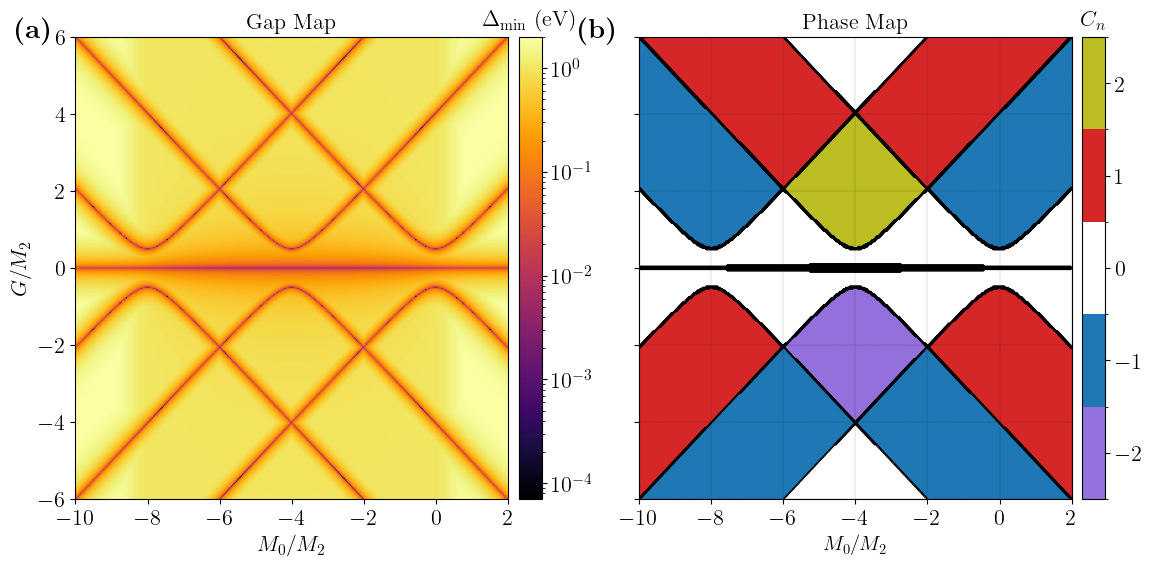

In [76]:
# ------------------------------------------------------------
# 1) CONFIGURACIÓN GLOBAL  (fuentes y LaTeX)
# ------------------------------------------------------------
mpl.rcParams.update({
    'text.usetex'  : True,
    'font.family'  : 'serif',
    'font.serif'   : ['Computer Modern Roman'],   # la que trae TeX por defecto
    'axes.labelsize': 15,
    'axes.titlesize': 16,
})


# ------------------------------------------------------------
# 7) MAPA DE FASES (clasificación topológica a partir del gap)
# ------------------------------------------------------------
thr     = 6e-2                           # umbral → gap "cerrado"
inside  = gap_map >= thr                 # True = región con gap
labels, n_reg = ndimage.label(
    inside,
    structure=[[0,1,0], [1,1,1], [0,1,0]]
)

# 7.1) asignación manual {etiqueta : (código, color)}
phase_dict = {
      1: (-1, 'tab:blue'),
      2: ( 0, 'white'),
      3: (-1, 'tab:blue'),
      4: ( 1, 'tab:red'),
      5: ( 1, 'tab:red'),
      6: (-2, 'mediumpurple'),
      7: ( 0, 'white'),
      8: ( 0, 'white'),
      9: (-1, 'tab:blue'),
     10: ( 2, 'tab:olive'),
     11: (-1, 'tab:blue'),
     12: ( 1, 'tab:red'),
     13: ( 1, 'tab:red'),
     14: ( 0, 'white'),
}

# 7.2) matriz de códigos (NaN en fronteras) + tabla de colores única
code_map = np.full_like(labels, np.nan, dtype=float)
code2color = {}
for lab, (code, color) in phase_dict.items():
    if lab > n_reg:
        raise ValueError(f'Etiqueta {lab} no existe (sólo 1..{n_reg}).')
    code_map[labels == lab] = code
    code2color[code] = color            # machaca duplicados

code_list  = np.array(sorted(code2color))         # [-2,-1,0,1,2]
color_list = np.array([code2color[c] for c in code_list])

cmap_phase = ListedColormap(color_list, N=len(code_list))
cmap_phase.set_bad('black')                       # fronteras

bounds = np.arange(code_list.min() - 0.5, code_list.max() + 1.5, 1)
norm_phase = BoundaryNorm(bounds, cmap_phase.N)

code_map_masked = np.ma.masked_invalid(code_map)


# ------------------------------------------------------------
# 8) FIGURA CON SUBPLOTS COMPARTIENDO EJE Y
# ------------------------------------------------------------

fig, (ax_gap, ax_phase) = plt.subplots(
    1, 2, sharey=True, figsize=(14, 6),
    gridspec_kw={'wspace': 0.08}
)

# --- 8.1) panel de gap (log‑escala) --------------------------
im_gap = ax_gap.imshow(
    gap_map, origin='lower',
    extent=[M0_values.min(), M0_values.max(),       # X
            G_values.min(),  G_values.max()],       # Y
    aspect='auto',
    cmap='inferno',
    norm=LogNorm(vmin=gap_map.min(), vmax=gap_map.max())
)
ax_gap.set_xlabel(r'$M_0/M_2$',fontsize=16)
ax_gap.set_ylabel(r'$G/M_2$',fontsize=16)
ax_gap.set_title(r'Gap Map')
ax_gap.tick_params(axis='both', which='both', labelsize=16)

cbar_gap = fig.colorbar(im_gap, ax=ax_gap, pad=0.02)
cbar_gap.ax.set_title(r"$\Delta_{\min}$ (eV)", pad=8, fontsize=16)
cbar_gap.ax.tick_params(labelsize=16)

'''ax_gap.text(
    0.25, 0.25, r'$G^2=\mathcal{M}_\Gamma^2+T^2$',            # un poco desplazada en x
    va='center', ha='left', c='k',fontsize=14
)

ax_gap.text(
    0.25, 1.25, r'$G^2=\mathcal{M}_X^2+T^2$',            # un poco desplazada en x
    va='center', ha='left', c='k',fontsize=14
)

ax_gap.text(
    0.25, 2., r'$G^2=\mathcal{M}_M^2+T^2$',            # un poco desplazada en x
    va='center', ha='left', c='k',fontsize=14
)'''

# --- 8.2) panel de fases topológicas -------------------------
im_phase = ax_phase.imshow(
    code_map_masked, origin='lower',
    cmap=cmap_phase, norm=norm_phase,
    extent=[M0_values.min(), M0_values.max(),
            G_values.min(),  G_values.max()],
    aspect='auto'
)

levels = np.arange(0.5, n_reg + 1, 1)      # contornos de las etiquetas
ax_phase.contour(
    labels, levels=levels, colors='k', linewidths=0.5,
    origin='lower',
    extent=[M0_values.min(), M0_values.max(),
            G_values.min(),  G_values.max()]
)

ax_phase.set_xlabel(r'$M_0/M_2$')
ax_phase.set_title(r'Phase Map')
ax_phase.grid(color='k', lw=.3, alpha=.3)
ax_phase.tick_params(axis='both', which='both', labelsize=16)

cbar_phase = fig.colorbar(
    im_phase, ax=ax_phase, pad=0.02,
    boundaries=bounds, ticks=code_list,
    spacing='uniform', extend='neither'
)

cbar_phase.ax.set_title(r"$C_n$", pad=8, fontsize=16)
cbar_phase.ax.tick_params(labelsize=16)

# ------------------------------------------------------------
# 9) AJUSTES FINALES
# ------------------------------------------------------------
createletters((ax_gap, ax_phase),coord=[-0.14, 1.])

plt.tight_layout()
plt.savefig('Figs/MapasChern.pdf')
plt.show()

## Ribbons 

In [78]:
import sys
import kwant

sys.path.append('..')

from FuncsChern import *
import numpy as np
#import kwant

# Pauli matrices
sx = np.array([[0, 1],[1, 0]], dtype=complex)
sy = np.array([[0, -1j],[1j, 0]], dtype=complex)
sz = np.array([[1, 0],[0, -1]], dtype=complex)
s0 = np.eye(2, dtype=complex)

def Matrices_Gamma():

    G0z = np.kron(s0,sz)
    G0x = np.kron(s0,sx)
    Gzy = np.kron(sz,sy)
    G00 = np.kron(s0,s0)
    Gzz = np.kron(sz,sz)
    Gyy = np.kron(sy,sy)
    return G0z,G0x,Gzy,G00,Gzz,Gyy

G0z,G0x,Gzy,G00,Gzz,Gyy = Matrices_Gamma()


def Ribbon_BHZ(params):
    a = params["a"]
    L = params["L"]
    lat = kwant.lattice.chain(a,norbs=4)

    def OS(site, kx, a, C0, C2, M0, M2, A,G,T):
            ck2_xy = 2.0 - np.cos(kx * a)
            epsilon_0 = C0 + (2 * C2 / (a ** 2)) * ck2_xy
            M_0 = M0 + (2 * M2 / (a ** 2)) * ck2_xy
            
            OS_matrix = (
                epsilon_0 * G00 +
                M_0 * G0z +
                (A / a) * (np.sin(kx * a) * G0x )+
                G * Gzz +
                T * Gyy
            )
            return OS_matrix

    def HOP(site1, site2, a, C2, M2, A):
            HOP_matrix = (
                (1 / a ** 2) * (C2 * G00 + M2 * G0z) +
                (1j * A) / (2 * a) * Gzy
            )
            
            return HOP_matrix

    syst = kwant.Builder()
    
    for z in range(int(L//a)+1):
        syst[lat(z)] = OS
    syst[kwant.builder.HoppingKind((1,), lat, lat)] = HOP


    return syst.finalized()

/opt/anaconda3/lib/python3.12/site-packages/kwant/solvers/default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


In [79]:
## Una QL son 10A, que son : Se-Bi-Se-Bi-Se. La c son aproximadamente 3 QLs

H_params = {
        "L":200*4 , 
        'C0':0.0068,
    'C2':19.6,
    'M0':-0.28,
    'M2':1,
    'A':2.2,
    'a':1,
    'G':-2,
    'T':0.5
            }

syst = Ribbon_BHZ(H_params)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# ----------- Parámetros ------------------
Npts = 301
a=H_params['a']
# kx grid en \AA^{-1}
kx_vals = np.linspace(-3/(4*a)-0.01/a, 3/(4*a)+0.01/a, Npts) 

E_all = []
vec_all = []
for kx in tqdm(kx_vals):
    H_params["kx"] = kx
    H = syst.hamiltonian_submatrix(params=H_params)
    E,vec = np.linalg.eigh(H)
    E_all.append(np.sort(E))
    vec_all.append(vec)
E_all = np.array(E_all)
vec_all = np.array(vec_all)

  0%|          | 0/301 [00:00<?, ?it/s]

In [ ]:
## Sacar los minimos: 
L = 201
vec_all = vec_all.reshape([Npts, 4*L, 4*L])

k0 = Npts//2
num_minima = 16

ens_k0 = E_all[k0, :]

sorted_indices = np.argsort(np.abs(ens_k0))[:num_minima]

min_values = [(band_idx, ens_k0[band_idx]) for band_idx in sorted_indices]

print(f"Los {num_minima} valores más pequeños (en valor absoluto) para k_y={kx_vals[ky_selected_index]}:")
for i, (band_idx, energy) in enumerate(min_values):
    print(f"{i+1}. Banda: {band_idx}, Energía: {energy}")

Los 16 valores más pequeños (en valor absoluto) para k_y=0.0:
1. Banda: 199, Energía: -0.057339131106115535
2. Banda: 198, Energía: -0.05733913110611565
3. Banda: 197, Energía: -0.061902320776115384
4. Banda: 196, Energía: -0.061902320776117556
5. Banda: 195, Energía: -0.08061382743236047
6. Banda: 194, Energía: -0.08061382743236181
7. Banda: 193, Energía: -0.09456979958873242
8. Banda: 192, Energía: -0.09456979958873318
9. Banda: 200, Energía: 0.10371952643211205
10. Banda: 201, Energía: 0.10371952643211492
11. Banda: 202, Energía: 0.10380281692200738
12. Banda: 203, Energía: 0.10380281692201002
13. Banda: 191, Energía: -0.11448729233555739
14. Banda: 190, Energía: -0.11448729233555768
15. Banda: 189, Energía: -0.1358656974023826
16. Banda: 188, Energía: -0.13586569740238383


Selected bands at k₀=160:
  401 (E=0.0776 eV), 400 (E=0.0516 eV), 402 (E=0.1299 eV), 403 (E=0.1560 eV)


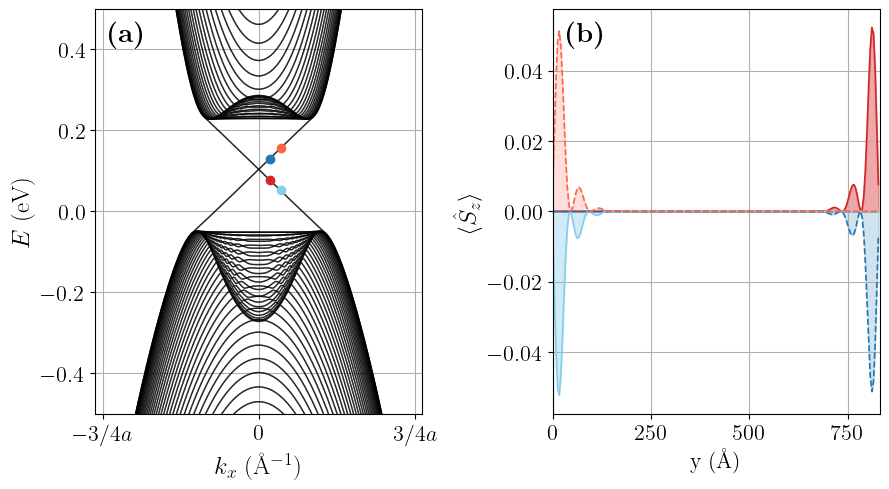

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import kwant

# --- 1) BASIC PARAMETERS ---
a            = 4.14                      # unit-cell length in Å
L            = 201                       # number of unit cells
total_length = L * a                     # 414 Å
Npts         = len(kx_vals)              # number of k-points
nbands       = E_all.shape[1]            # number of bands

# --- 2) RESHAPE vec_all TO (Npts, 4L, nbands) ---
vec_all = vec_all.reshape(Npts, 4*L, nbands)

# --- 3) DENSITY OPERATOR ---
Dense = kwant.operator.Density(syst, np.kron(sz, sz))

# --- 4) PICK k0 AND FOUR BANDS CLOSEST TO E=0.1 ---
k0 = Npts // 2 + 10
k02 = Npts// 2 + 20
energies_at_k0 = E_all[k0, :]
energies_at_k02 = E_all[k02, :]

# sort by |E−0.1| and take first 4
closest = np.argsort(np.abs(energies_at_k0 - 0.1))[:4]
band0, band1, band2, band3 = map(int, closest)
E0, E1 = energies_at_k0[band0], energies_at_k02[band1]
E2, E3 = energies_at_k0[band2], energies_at_k02[band3]

print(f"Selected bands at k₀={k0}:")
print(f"  {band0} (E={E0:.4f} eV), "
      f"{band1} (E={E1:.4f} eV), "
      f"{band2} (E={E2:.4f} eV), "
      f"{band3} (E={E3:.4f} eV)")

# --- 5) EXTRACT WAVEFUNCTIONS & DENSITIES ---
u0      = vec_all[k0, :, band0]
u1      = vec_all[k0, :, band1]
u2      = vec_all[k0, :, band2]
u3      = vec_all[k0, :, band3]
dens_u0 = Dense(u0)
dens_u1 = Dense(u1)
dens_u2 = Dense(u2)
dens_u3 = Dense(u3)

# cell index → real length
cells   = np.arange(len(dens_u0))
lengths = cells * a

# --- 6) PLOTTING ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))

# 6a) Band structure
for band in E_all.T:
    ax1.plot(kx_vals, band, color='black', lw=1, alpha=0.6)

# highlight the four selected states
ax1.plot(kx_vals[k0], E0, 'o', color='tab:red',  markersize=6, label=f'band {band0}')
ax1.plot(kx_vals[k02], E1, 'o', color='skyblue', markersize=6, label=f'band {band1}')
ax1.plot(kx_vals[k0], E2, 'o', color='tab:blue',  markersize=6, label=f'band {band2}')
ax1.plot(kx_vals[k02], E3, 'o', color='tomato', markersize=6, label=f'band {band3}')

# ticks at −3/(4a), 0, +3/(4a)
xticks = np.array([-3, 0, 3]) / (4 * a)
ax1.set_xticks(xticks)
ax1.set_xticklabels([r"$-3/4a$", r"$0$", r"$3/4a$"], fontsize=20)

ax1.set_xlim(kx_vals[0], kx_vals[-1])
ax1.set_ylim(-0.5, 0.5)
ax1.set_xlabel(r'$k_x$ (Å$^{-1}$)', fontsize=18)
ax1.set_ylabel(r'$E$ (eV)',         fontsize=18)
ax1.tick_params(axis='both', labelsize=16)
ax1.grid(True)
#ax1.legend(fontsize=12, frameon=False)

# 6b) Probability density vs. real length
ax2.plot(lengths, dens_u0, '-', lw=1.2, color='tab:red')
ax2.fill_between(lengths, dens_u0, color='tab:red',  alpha=0.4)
ax2.plot(lengths, dens_u1, '-', lw=1.2, color='skyblue')
ax2.fill_between(lengths, dens_u1, color='skyblue', alpha=0.4)
ax2.plot(lengths, dens_u2, '--', lw=1.2, color='tab:blue')
ax2.fill_between(lengths, dens_u2, color='tab:blue',  alpha=0.2)
ax2.plot(lengths, dens_u3, '--', lw=1.2, color='tomato')
ax2.fill_between(lengths, dens_u3, color='tomato', alpha=0.2)

ax2.set_xlabel("y (Å)", fontsize=16)
ax2.set_ylabel(r'$\langle \hat{S}_z \rangle$', fontsize=18)
ax2.tick_params(axis='both', labelsize=16)
ax2.set_xlim(0, total_length)
ax2.grid(True)

createletters((ax1, ax2), coord=[0.04,0.92])

plt.tight_layout()
plt.savefig('Figs/Z2_edgestates.pdf')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import kwant

# --- 1) BASIC PARAMETERS ---
a            = 4.14                      # unit-cell length in Å
L            = 201                       # number of unit cells
total_length = L * a                     # 414 Å
Npts         = len(kx_vals)              # number of k-points
nbands       = E_all.shape[1]            # number of bands

# --- 2) RESHAPE vec_all TO (Npts, 4L, nbands) ---
vec_all = vec_all.reshape(Npts, 4*L, nbands)

# --- 3) DENSITY OPERATOR ---
Dense = kwant.operator.Density(syst, np.kron(sz, sz))

# --- 4) PICK k0 AND FOUR BANDS CLOSEST TO E=0.1 ---
k0 = Npts // 2 + 10
k02 = Npts// 2 + 20
energies_at_k0 = E_all[k0, :]
energies_at_k02 = E_all[k02, :]

# sort by |E−0.1| and take first 4
closest = np.argsort(np.abs(energies_at_k0 - 0.1))[:4]
band0, band1, band2, band3 = map(int, closest)
E0, E1 = energies_at_k0[band0], energies_at_k02[band1]
E2, E3 = energies_at_k0[band2], energies_at_k02[band3]

print(f"Selected bands at k₀={k0}:")
print(f"  {band0} (E={E0:.4f} eV), "
      f"{band1} (E={E1:.4f} eV), "
      f"{band2} (E={E2:.4f} eV), "
      f"{band3} (E={E3:.4f} eV)")

# --- 5) EXTRACT WAVEFUNCTIONS & DENSITIES ---
u0      = vec_all[k0, :, band0]
u1      = vec_all[k0, :, band1]
u2      = vec_all[k0, :, band2]
u3      = vec_all[k0, :, band3]
dens_u0 = Dense(u0)
dens_u1 = Dense(u1)
dens_u2 = Dense(u2)
dens_u3 = Dense(u3)

# cell index → real length
cells   = np.arange(len(dens_u0))
lengths = cells * a

# --- 6) PLOTTING ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))

# 6a) Band structure
for band in E_all.T:
    ax1.plot(kx_vals, band, color='black', lw=1, alpha=0.6)

# highlight the four selected states
ax1.plot(kx_vals[k0], E0, 'o', color='tab:red',  markersize=6, label=f'band {band0}')
ax1.plot(kx_vals[k02], E1, 'o', color='skyblue', markersize=6, label=f'band {band1}')
ax1.plot(kx_vals[k0], E2, 'o', color='tab:blue',  markersize=6, label=f'band {band2}')
ax1.plot(kx_vals[k02], E3, 'o', color='tomato', markersize=6, label=f'band {band3}')

# ticks at −3/(4a), 0, +3/(4a)
xticks = np.array([-3, 0, 3]) / (4 * a)
ax1.set_xticks(xticks)
ax1.set_xticklabels([r"$-3/4a$", r"$0$", r"$3/4a$"], fontsize=20)

ax1.set_xlim(kx_vals[0], kx_vals[-1])
ax1.set_ylim(-0.5, 0.5)
ax1.set_xlabel(r'$k_x$ (Å$^{-1}$)', fontsize=18)
ax1.set_ylabel(r'$E$ (eV)',         fontsize=18)
ax1.tick_params(axis='both', labelsize=16)
ax1.grid(True)
#ax1.legend(fontsize=12, frameon=False)

# 6b) Probability density vs. real length
ax2.plot(lengths, dens_u0, '-', lw=1.2, color='tab:red')
ax2.fill_between(lengths, dens_u0, color='tab:red',  alpha=0.4)
ax2.plot(lengths, dens_u1, '-', lw=1.2, color='skyblue')
ax2.fill_between(lengths, dens_u1, color='skyblue', alpha=0.4)
ax2.plot(lengths, dens_u2, '--', lw=1.2, color='tab:blue')
ax2.fill_between(lengths, dens_u2, color='tab:blue',  alpha=0.2)
ax2.plot(lengths, dens_u3, '--', lw=1.2, color='tomato')
ax2.fill_between(lengths, dens_u3, color='tomato', alpha=0.2)

ax2.set_xlabel("y (Å)", fontsize=16)
ax2.set_ylabel(r'$\langle \hat{S}_z \rangle$', fontsize=18)
ax2.tick_params(axis='both', labelsize=16)
ax2.set_xlim(0, total_length)
ax2.grid(True)

createletters((ax1, ax2), coord=[0.04,0.92])

plt.tight_layout()
plt.savefig('Figs/Z2_edgestates.pdf')
plt.show()